In [1]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

#suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# Step 1 loading datatset

In [2]:
data = pd.read_csv('employee_ada.csv')

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Predict Attrition using the other 34 variables

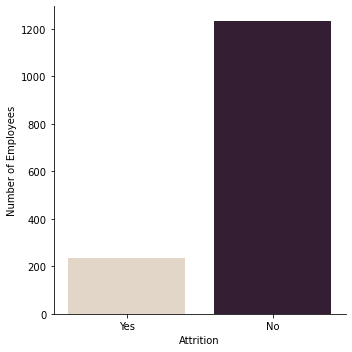

In [3]:
#visualising Attrition

ax = sns.catplot(data=data, x='Attrition', kind='count', palette="ch:.25")
ax.set(xlabel = 'Attrition', ylabel='Number of Employees')
plt.show()

#low number of yes - meaning there are fewer people that quit. Unbalanced dataset. HR Analytics

In [4]:
#checking missing values
def null_dataframe(df):
    nulls = pd.DataFrame(df.isnull().mean().mul(100).sort_values(ascending=False), columns=['null_perc'])
    return nulls[nulls['null_perc']> 0]

null_dataframe(data)

,null_perc


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Step 2 - feature engineering

adaboost can not work with categorical data the same way as a basic decision tree so we need to handle them

In [6]:
#extracting numeric ands categorical variables

data_num = pd.DataFrame(data= data.select_dtypes(include = ['int64']))
data_cat = pd.DataFrame(data = data.select_dtypes(include = ['object']))

print(f"Shape of OG dataframe is {data.shape}")
print(f"Shape of Numeric is {data_num.shape}")
print(f"Shape of Categoricals is {data_cat.shape}")

Shape of OG dataframe is (1470, 35)
Shape of Numeric is (1470, 26)
Shape of Categoricals is (1470, 9)


9 variables need to be handled

### 2.1 Encoding Categorical FIelds

In [7]:
#one hot encoding
#dropping response variables

data_cat = data_cat.drop(['Attrition'], axis=1)

#encoding using get_dummies
data_cat_encoded = pd.get_dummies(data_cat)
data_cat_encoded.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


### 2.2 Scaling Numeric Fields

In [9]:
scaler = StandardScaler()
data_num_scaled = scaler.fit_transform(data_num)

#remake dataframe - scaler gives numpy array
data_num_scaled = pd.DataFrame(data = data_num_scaled, columns=data_num.columns, index= data_num.index)

#print shapes of new dataframes
print(f"Shape of Numerics after scaling {data_num_scaled.shape}")
print(f"Shape of categoricals after encoding {data_cat_encoded.shape}")

Shape of Numerics after scaling (1470, 26)
Shape of categoricals after encoding (1470, 29)


In [10]:
#combine into one dataframe

data_transformed = pd.concat([data_num_scaled, data_cat_encoded], axis=1)
print(f"Shape of transformed dataframe {data_transformed.shape}")

Shape of transformed dataframe (1470, 55)


In [13]:
#getting the response variable

response = data['Attrition']

#mapping
map = {'Yes':1, 'No':0}
response = response.apply(lambda x : map[x])
response.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [14]:
#create x and y variables

X = data_transformed
y = response




### 2.3 Train Test Split

In [15]:
#splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=3, stratify=y)

#about stratify https://scikit-learn.org/stable/modules/cross_validation.html#stratification



# Step 3 Model Fitting

##### The most important features are estimator, n_estimators, and learning_rate
1) estimator is the learning algorithm you will use, the default is DecisionTreeClassifier with maximum depth of 1


2) n_estimators is the number of models to interatively train


3) learning_rate is the contribution of each model to the weights and the default value is 1. 


- There is a trade-off betwen learning_rate and n_estimators. Reducing the learning rate will force the model to train slower (sometimes resulting in better performance scores). Decreasing the learning rate makes the coefficients of alpha_m smaller, which reduces the amplitutde of the sample_weights at each step (As per weight formula we use each step for updating weights).

In [25]:
#using adaboost 

adaboost = AdaBoostClassifier(n_estimators=201, random_state=3)

#fit model
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=201, random_state=3)

In [26]:
#predictions

y_pred = adaboost.predict(X_test)

print(f"Accuracy of model is {accuracy_score(y_test,y_pred)}")

Accuracy of model is 0.8503401360544217


In [27]:
#confusion matrix

print(f"Accuracy of model is \n {confusion_matrix(y_test,y_pred)}")

Accuracy of model is 
 [[232  15]
 [ 29  18]]
